In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 



In [8]:
comments = pd.read_csv(r"C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy/UScomments.csv" , on_bad_lines = "skip")

C:\Users\aniru\AppData\Local\Temp\ipykernel_117472\2339116497.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r"C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy/UScomments.csv" , on_bad_lines = "skip")


In [9]:
comments.head(5)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [10]:
type(comments)

pandas.core.frame.DataFrame

In [12]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [13]:
comments.dropna(inplace = True)

In [14]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

NameError: name 'nltk' is not defined

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
import nltk

In [20]:
sia = SentimentIntensityAnalyzer()


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\aniru/nltk_data'
    - 'C:\\Users\\aniru\\anaconda3\\nltk_data'
    - 'C:\\Users\\aniru\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\aniru\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\aniru\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [21]:
# Assistant
# First, import nltk and download the required lexicon
import nltk
nltk.download('vader_lexicon')

# Now you can use the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Now sia can be used for sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...


In [22]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [24]:
sentiment_scores = []
for comment in comments["comment_text"]:
    score = sia.polarity_scores(str(comment))['compound']
    sentiment_scores.append(score)


In [25]:
comments["polarity"] = sentiment_scores

In [26]:
filter_pos = (comments["polarity"] >= 0.8) & ((comments["polarity"] <= 1.0))

In [28]:
comments_positive = comments[filter_pos]

In [29]:
comments_positive.shape

(64310, 5)

In [30]:
filter_neg = (comments["polarity"] >= -1.0) & ((comments["polarity"] <= -0.8))

In [32]:
comments_negative = comments[filter_neg]

In [33]:
comments_negative.shape

(16148, 5)

In [34]:
! pip install wordcloud

In [36]:
comments_positive ["comment_text"]

24        I love Logan and Jake so much and thay are so ...
27        if you get allot of diss likes do you get on t...
29        I love you so much I love to meet you But I li...
45        This looks like a great video, but after you a...
57        Congrats Logan love u so much someday I would ...
                                ...                        
691312    Fabulous video, just so wonderful live.It's so...
691322    I love each and every version of this song. LP...
691324    Absolutely fabulous ! LP has the genius to ren...
691345                      Beautiful LP! You are gorgeous!
691356        No comments!  Enjoy!  Thanks!  Nice  weekend!
Name: comment_text, Length: 64310, dtype: object

In [37]:
type (comments_positive ["comment_text"])

pandas.core.series.Series

In [38]:
total_positive_comments = ' '.join(comments_positive ["comment_text"])

In [41]:
total_positive_comments[0:1000]

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍 if you get allot of diss likes do you get on the top comments? lets see diss like this please I love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it bye This looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :) Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️ Well done I LOVE! You so much :D I am very happy for this man and we need to spread more love. United we stand, divided we fall. And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Rea

In [39]:
from wordcloud import WordCloud , STOPWORDS

In [42]:
WordCloud().generate

<bound method WordCloud.generate of <wordcloud.wordcloud.WordCloud object at 0x00000144B89874D0>>

In [43]:
wordcloud_positive = WordCloud(stopwords = set(STOPWORDS)).generate(total_positive_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

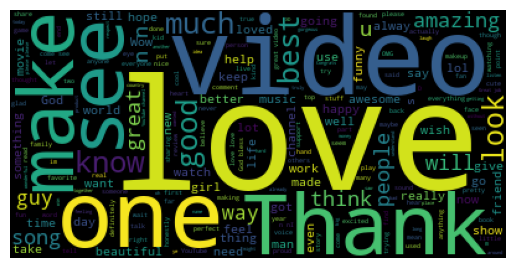

In [45]:
plt.imshow(wordcloud_positive)
plt.axis("off")

In [46]:
total_negative_comments = ' '.join(comments_negative ["comment_text"])

In [47]:
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

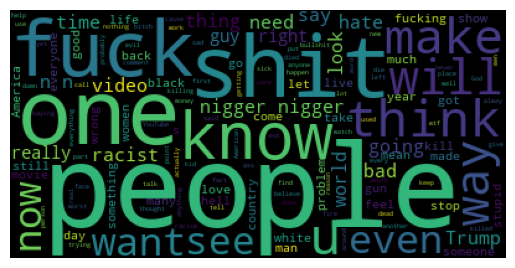

In [48]:
plt.imshow(wordcloud_negative)
plt.axis("off")

In [49]:
! pip install emoji==2.14.1

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   --------------------------------------- 590.6/590.6 kB 11.6 MB/s eta 0:00:00


In [50]:
import emoji

In [52]:
all_emojis_found = [] 

for comment in comments["comment_text"]:
    emojis_info = emoji.emoji_list(comment)
    emojis_found = [item["emoji"] for item in emojis_info]
    all_emojis_found.extend(emojis_found)

In [53]:
all_emojis_found[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [54]:
len(all_emojis_found)

288867

In [55]:
from collections import Counter

In [57]:
emojis_count_list_top10 = Counter (all_emojis_found).most_common(10)

In [58]:
emojis = [emoji for emoji , count in emojis_count_list_top10]
counts = [count for emoji , count in emojis_count_list_top10]

In [59]:
emojis

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']

In [60]:
! pip install plotly

In [61]:
import plotly.graph_objs as go 
from plotly.offline import iplot 

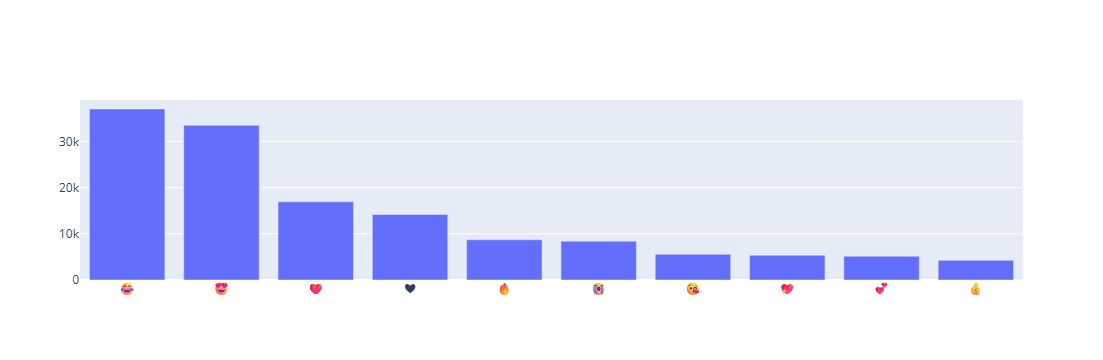

In [62]:
iplot([go.Bar(x = emojis , y = counts)])

In [63]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
import os 

In [66]:
files = os.listdir(r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data')

In [67]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [69]:
files_csv = [file for file in files if '.csv' in file]

In [70]:
full_df = pd.DataFrame()
path = r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+ '/' +file , encoding='iso-8859-1' , error_bad_lines= False)
    full_df = pd.concat([full_df , current_df] , ignore_index= True)

TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'. Did you mean 'on_bad_lines'?

In [71]:
# Assistant
full_df = pd.DataFrame()
path = r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data'

for file in files_csv:
    # Using on_bad_lines instead of error_bad_lines (deprecated parameter)
    current_df = pd.read_csv(path+ '/' +file, encoding='iso-8859-1', on_bad_lines='skip')
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [72]:
full_df.shape

(375942, 16)

In [73]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [74]:
full_df = full_df.drop_duplicates()


In [75]:
full_df.shape 

(339525, 16)

In [76]:
full_df[0:1000].to_csv(r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data' , index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\aniru\\Downloads\\Youtube_project_shan_singh_Udemy\\additional_data'

In [77]:
# Assistant
# Corrected code with proper file path including filename and .csv extension
full_df[0:1000].to_csv(r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data\output.csv', index=False)

In [81]:

full_df[0:1000].to_csv(r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data\output.csv', index=False)

In [80]:
full_df[0:1000].to_json(r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data\output.json')

In [82]:
from sqlalchemy import create_engine 

In [83]:
engine = create_engine(r'sqlite:///C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data\output.sqlite')

In [84]:
full_df[0:1000].to_sql('Users' , con=engine , if_exists = 'append' )

1000

In [85]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [88]:
json_df = pd.read_json(r'C:\Users\aniru\Downloads\Youtube_project_shan_singh_Udemy\additional_data/US_category_id.json')

In [89]:
json_df


kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [90]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [91]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [94]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

# Assistant
The error occurs because you're trying to use a variable called `cat` that hasn't been defined yet. The code is attempting to map category IDs to category names using a dictionary stored in `cat.dict`, but the `cat` object doesn't exist.

Would you like me to provide the corrected code?

# User
yes

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

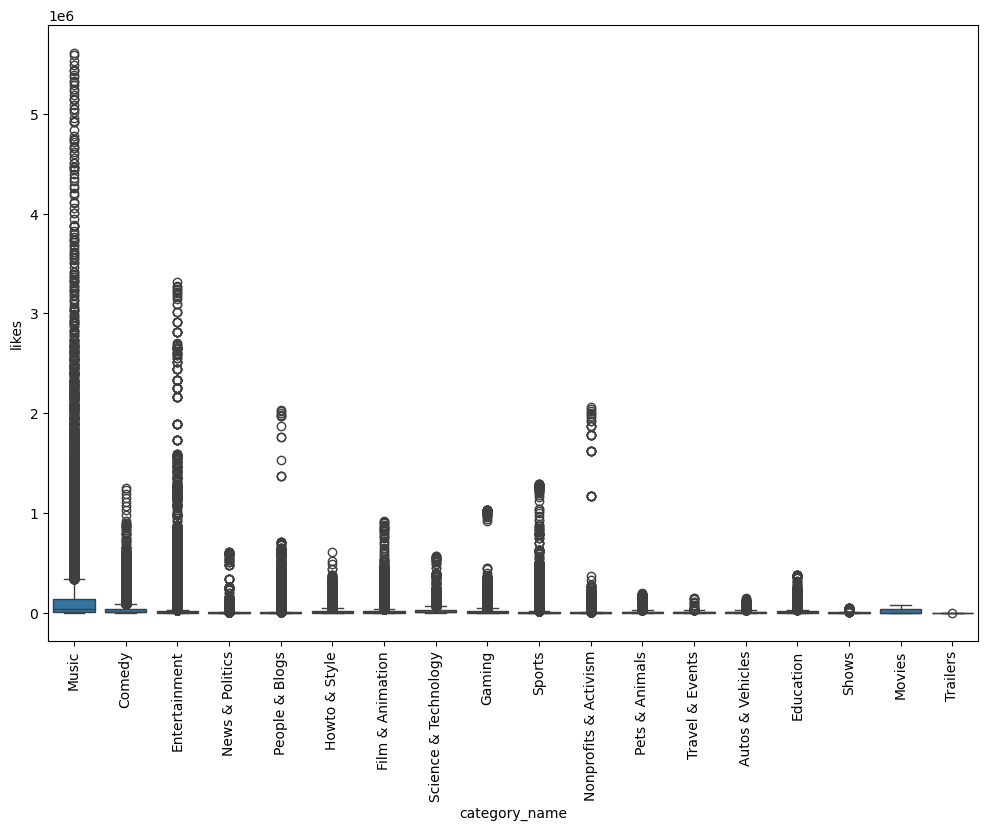

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

In [96]:
full_df['like_rate'] = (full_df['likes']/full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views']) * 100

In [97]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

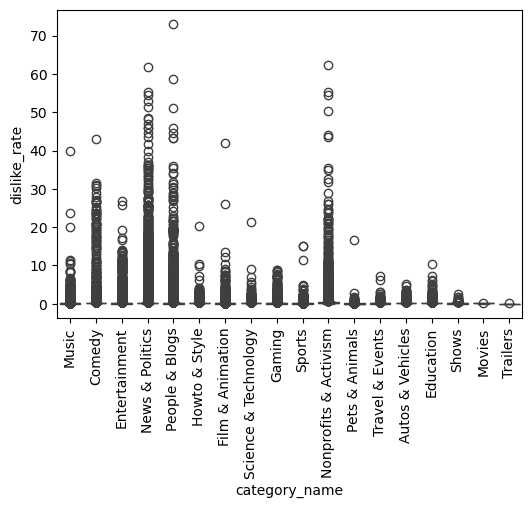

In [99]:
plt.figure(figsize=(6,4))
sns.boxplot(x='category_name' , y='dislike_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

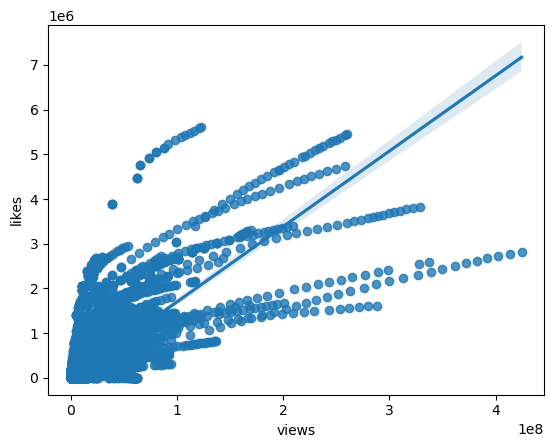

In [100]:
sns.regplot(x='views' , y='likes' , data = full_df)

<Axes: >

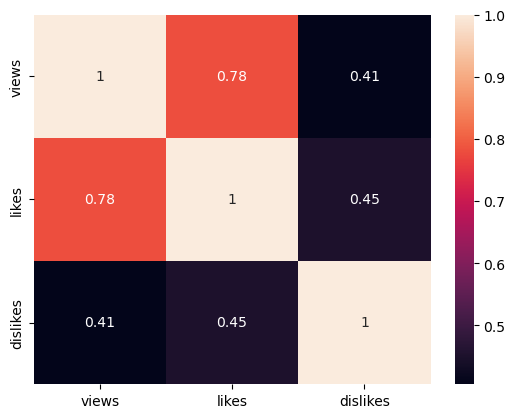

In [101]:
sns.heatmap(full_df[['views' , 'likes' , 'dislikes']].corr() , annot=True)

In [104]:
cdf = full_df['channel_title'].value_counts().reset_index()

In [105]:
cdf.rename(columns={0:'total_videos'})

channel_title  count
0      The Late Show with Stephen Colbert    710
1                                     WWE    643
2             Late Night with Seth Meyers    592
3                            TheEllenShow    555
4                       Jimmy Kimmel Live    528
...                                   ...    ...
37819                The Secrets of Dairy      1
37820                   babygranderecords      1
37821                  24 Oras News Today      1
37822                      turk2doubleoh8      1
37823                       BOOMPANOT.COM      1

[37824 rows x 2 columns]

In [106]:
import plotly.express as px 

In [107]:
px.bar(data_frame=cdf[0:20] , x = 'channel_title' , y = 'total_videos')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['channel_title', 'count'] but received: total_videos

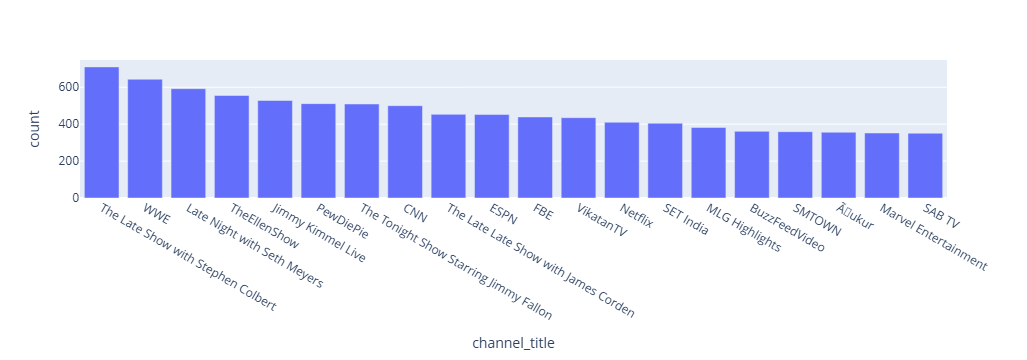

In [108]:
# Assistant
# Using the 'count' column instead of 'total_videos' since that's what exists in the dataframe
px.bar(data_frame=cdf[0:20], x='channel_title', y='count')

In [110]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [111]:
import string

In [112]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [113]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [114]:
sample = full_df[0:10000]

In [115]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [117]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

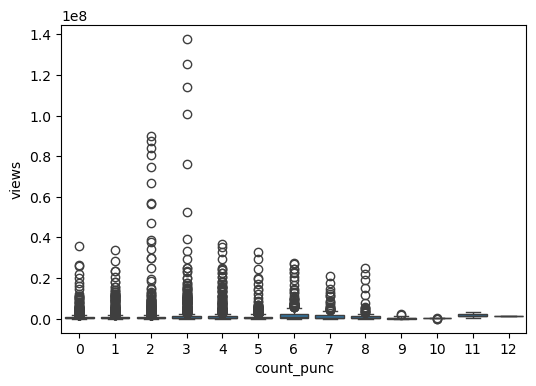

In [118]:
plt.figure(figsize=(6,4))
sns.boxplot(x='count_punc' , y='views' , data=sample)

plt.show()

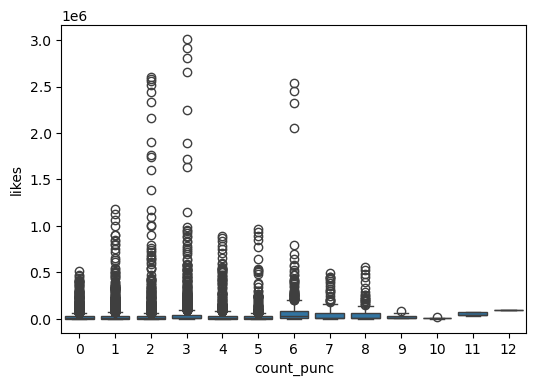

In [119]:
plt.figure(figsize=(6,4))
sns.boxplot(x='count_punc' , y='likes' , data=sample)

plt.show()